# Visuals Notebook for Resource Usage

In [1]:
from helpers import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load data for January 2024

In [2]:
year_2024_01 = process_gpu_data('24', '01')
year_2024_01

,time,bus,util,memory_throughput,user,project_x,job_id,scenario,qname,hostname,...,granted_pe,slots,task_number,cpu,options,pe_taskid,maxvmem,n_gpu,task_string,job_task
0,1704085201,00000000:17:00.0,90.0,72.0,zjguo,depend,3367552.undefined,1,ece,scc-216,...,omp8,8.0,0.0,93886.545949,"-U engineering,ece -u zjguo -l gpu_compute_cap...",NaN,1.175716e+11,1.0,undefined,3367552.undefined
1,1704085201,00000000:65:00.0,22.0,1.0,dgordon,textconv,3366341.undefined,1,ece,scc-216,...,omp,4.0,0.0,322113.971996,"-U ece,engineering -u dgordon -l gpu_compute_c...",NaN,3.344766e+11,1.0,undefined,3366341.undefined
2,1704085201,00000000:CA:00.0,83.0,52.0,animikh,rlvn,3321766.undefined,1,ece,scc-216,...,omp8,8.0,0.0,689953.903543,"-U rlvn,ece,academic,engineering -u animikh -l...",NaN,5.860159e+11,2.0,undefined,3321766.undefined
3,1704085201,00000000:E3:00.0,80.0,46.0,animikh,rlvn,3321766.undefined,1,ece,scc-216,...,omp8,8.0,0.0,689953.903543,"-U rlvn,ece,academic,engineering -u animikh -l...",NaN,5.860159e+11,2.0,undefined,3321766.undefined
4,1704085501,00000000:17:00.0,92.0,75.0,zjguo,depend,3367552.undefined,1,ece,scc-216,...,omp8,8.0,0.0,93886.545949,"-U engineering,ece -u zjguo -l gpu_compute_cap...",NaN,1.175716e+11,1.0,undefined,3367552.undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619022,1706762701,00000000:82:00.0,0.0,0.0,Missing Values,Missing Values,4193291.undefined,2,onrcc-gpu,scc-x03,...,omp,4.0,0.0,5609.930000,"-U onrcc,engineering -u dche1 -l gpu_compute_c...",NaN,3.619530e+10,2.0,undefined,4193291.undefined
2619023,1706763001,00000000:02:00.0,0.0,0.0,Missing Values,Missing Values,4193291.undefined,2,onrcc-gpu,scc-x03,...,omp,4.0,0.0,5609.930000,"-U onrcc,engineering -u dche1 -l gpu_compute_c...",NaN,3.619530e+10,2.0,undefined,4193291.undefined
2619024,1706763001,00000000:82:00.0,0.0,0.0,Missing Values,Missing Values,4193291.undefined,2,onrcc-gpu,scc-x03,...,omp,4.0,0.0,5609.930000,"-U onrcc,engineering -u dche1 -l gpu_compute_c...",NaN,3.619530e+10,2.0,undefined,4193291.undefined
2619025,1706763301,00000000:02:00.0,0.0,0.0,Missing Values,Missing Values,4193291.undefined,2,onrcc-gpu,scc-x03,...,omp,4.0,0.0,5609.930000,"-U onrcc,engineering -u dche1 -l gpu_compute_c...",NaN,3.619530e+10,2.0,undefined,4193291.undefined


In [3]:
node_status = pd.read_csv('/projectnb/scv/utilization/katia/queue_info.csv')
node_status_mapping = node_status.set_index('queuename')['class_own'].to_dict()
year_2024_01['status'] = year_2024_01['qname'].map(node_status_mapping)
year_2024_01['status'].value_counts(), year_2024_01['status'].isna().sum()

(status
 buyin     999480
 shared    123163
 Name: count, dtype: int64,
 np.int64(1496384))

In [4]:
node_status

,queuename,queuetotal,class_user,class_own,class_util
0,4,4,shared,shared,compute
1,a,a,shared,shared,compute
2,a100,a100,shared,shared,gpu
3,a128,a,shared,shared,compute
4,a40,a40,shared,shared,gpu
...,...,...,...,...,...
288,withers01-pub,withers01-pub,shared,buyin,buyin
289,wys-text,wys-text-pub,buyin,buyin,buyin
290,wys-text-pub,wys-text-pub,shared,buyin,buyin
291,y,y,shared,shared,compute


## Look at GPU average utilization over the time period

In [5]:
# Convert 'time' to datetime
year_2024_01['time'] = pd.to_datetime(year_2024_01['time'], unit='s')

# Resample utilization by 1-hour intervals (mean utilization)
gpu_util_hourly = year_2024_01.resample('1H', on='time')['util'].mean()

# Fill nans with 0
gpu_util_hourly[gpu_util_hourly.isna()] = 0

# Resample utilization by 1-hour intervals (mean utilization)
gpu_util_hourly_buyin = year_2024_01[year_2024_01['status']=='buyin'].resample('1H', on='time')['util'].mean()
gpu_util_hourly_shared = year_2024_01[year_2024_01['status']=='shared'].resample('1H', on='time')['util'].mean()

# Fill nans with 0
gpu_util_hourly[gpu_util_hourly.isna()] = 0
gpu_util_hourly_buyin[gpu_util_hourly_buyin.isna()] = 0
gpu_util_hourly_shared[gpu_util_hourly_shared.isna()] = 0



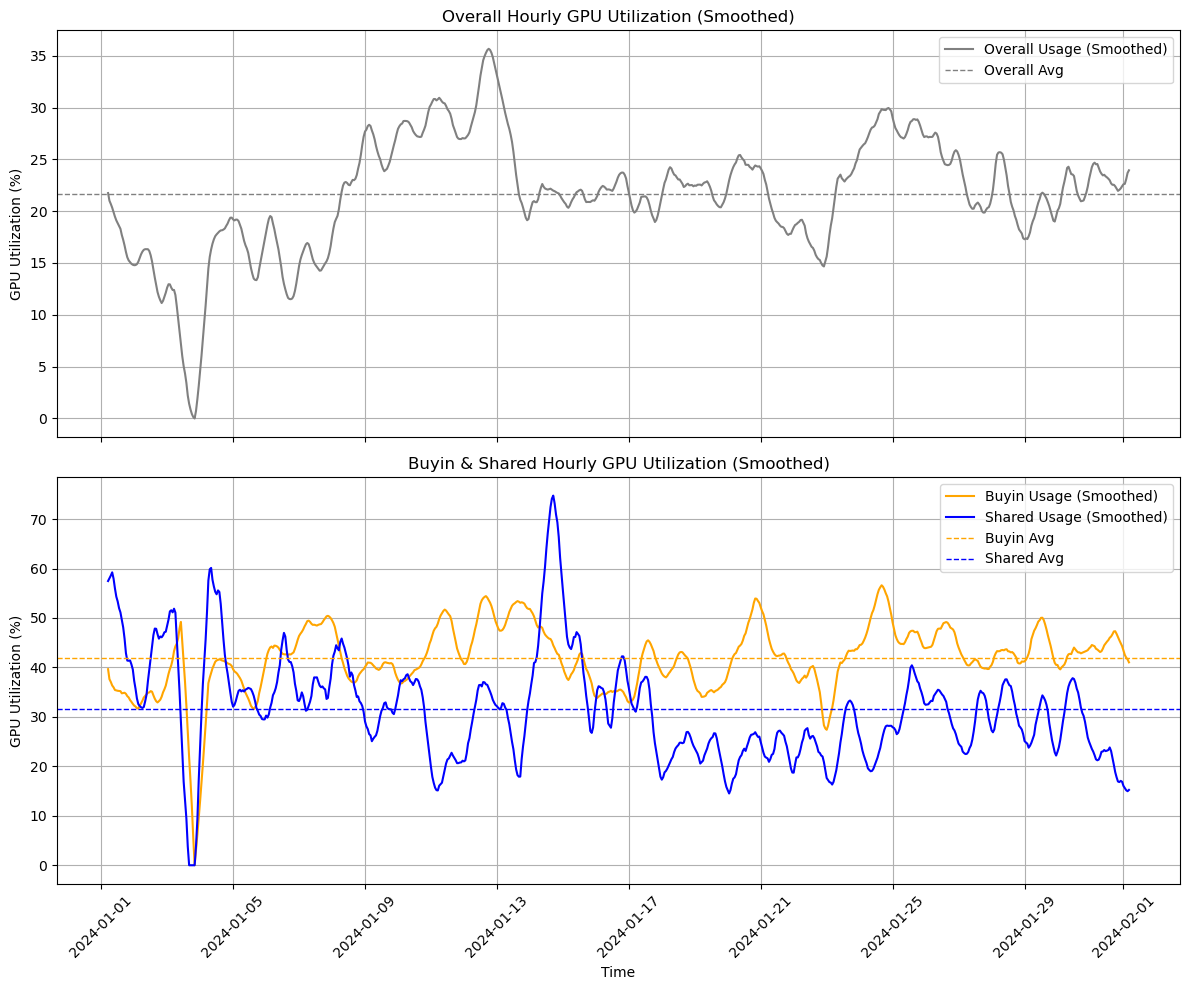

In [6]:
# Define moving average window size
window_size = 10  # Adjust as needed

# Compute moving averages
gpu_util_hourly_smooth = gpu_util_hourly.rolling(window=window_size, min_periods=1).mean()
gpu_util_hourly_buyin_smooth = gpu_util_hourly_buyin.rolling(window=window_size, min_periods=1).mean()
gpu_util_hourly_shared_smooth = gpu_util_hourly_shared.rolling(window=window_size, min_periods=1).mean()

# Create subplots: 2 rows, 1 column
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Overall Usage on the first subplot
sns.lineplot(ax=axes[0], x=gpu_util_hourly.index, y=gpu_util_hourly_smooth.values, color="gray", label="Overall Usage (Smoothed)")
axes[0].axhline(gpu_util_hourly_smooth.mean(), color="gray", linestyle="dashed", linewidth=1, label="Overall Avg")
axes[0].set_ylabel("GPU Utilization (%)")
axes[0].set_title("Overall Hourly GPU Utilization (Smoothed)")
axes[0].legend()
axes[0].grid()

# Plot Buyin & Shared Usage on the second subplot
sns.lineplot(ax=axes[1], x=gpu_util_hourly_buyin.index, y=gpu_util_hourly_buyin_smooth.values, color="orange", label="Buyin Usage (Smoothed)")
sns.lineplot(ax=axes[1], x=gpu_util_hourly_shared.index, y=gpu_util_hourly_shared_smooth.values, color="blue", label="Shared Usage (Smoothed)")
axes[1].axhline(gpu_util_hourly_buyin_smooth.mean(), color="orange", linestyle="dashed", linewidth=1, label="Buyin Avg")
axes[1].axhline(gpu_util_hourly_shared_smooth.mean(), color="blue", linestyle="dashed", linewidth=1, label="Shared Avg")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("GPU Utilization (%)")
axes[1].set_title("Buyin & Shared Hourly GPU Utilization (Smoothed)")
axes[1].legend()
axes[1].grid()

# Adjust layout for better spacing
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Top GPU Users & Wasters by User, Project
### Summed by util, rather than count

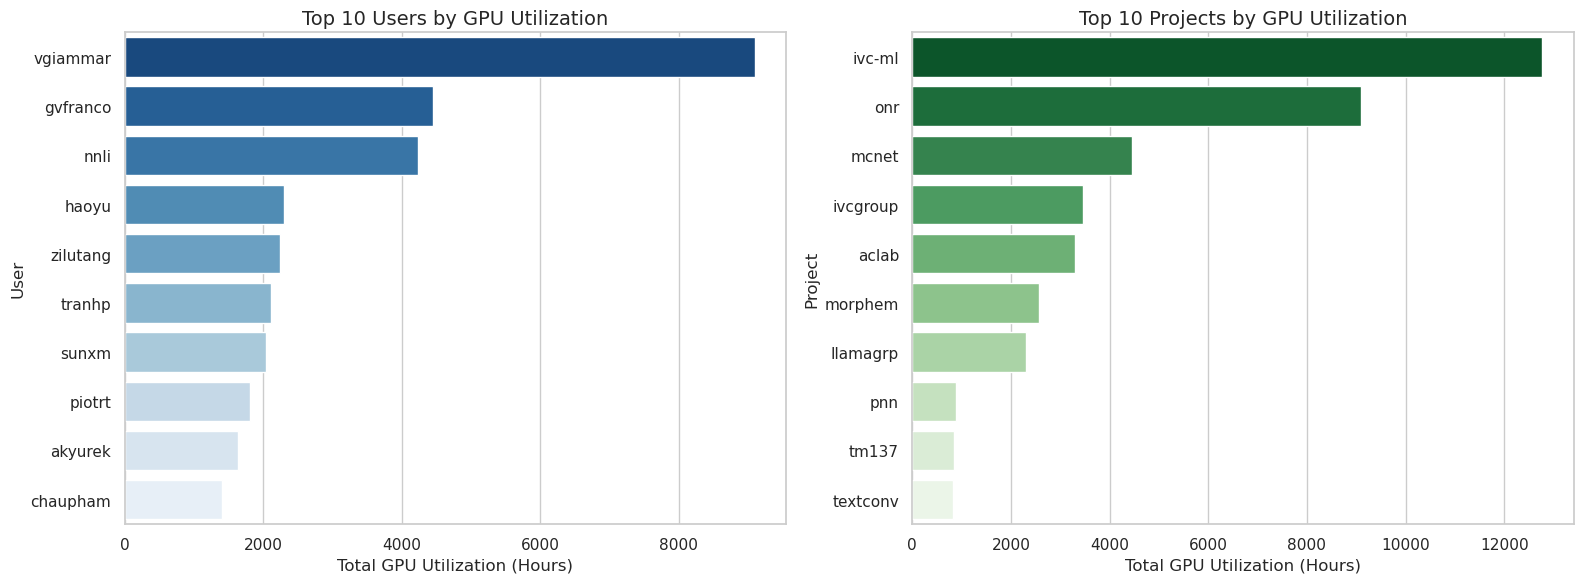

In [7]:
# Group by user and sum utilization
top_users = year_2024_01.groupby("user")["util"].sum().nlargest(10)

# Group by project and sum utilization
top_projects = year_2024_01.groupby("project_x")["util"].sum().nlargest(10)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create subplots for users and projects
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot top users
sns.barplot(x=top_users.values / 1200, y=top_users.index, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Users by GPU Utilization", fontsize=14)
axes[0].set_xlabel("Total GPU Utilization (Hours)", fontsize=12)
axes[0].set_ylabel("User", fontsize=12)

# Plot top projects
sns.barplot(x=top_projects.values / 1200, y=top_projects.index, ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 10 Projects by GPU Utilization", fontsize=14)
axes[1].set_xlabel("Total GPU Utilization (Hours)", fontsize=12)
axes[1].set_ylabel("Project", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
year_2024_01[year_2024_01['user']=='vgiammar']

,time,bus,util,memory_throughput,user,project_x,job_id,scenario,qname,hostname,...,slots,task_number,cpu,options,pe_taskid,maxvmem,n_gpu,task_string,job_task,status
998129,2024-01-01 05:00:02,00000000:4F:00.0,3.0,1.0,vgiammar,onr,-,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998133,2024-01-01 05:00:02,00000000:D5:00.0,86.0,74.0,vgiammar,onr,3342774.undefined,1,neuro-autonomy,scc-302,...,5.0,0.0,202937.520000,"-U noc-lab,engineering,neuromorphics,ece,neuro...",NaN,7.896011e+10,1.0,undefined,3342774.undefined,buyin
998134,2024-01-01 05:00:02,00000000:D6:00.0,77.0,71.0,vgiammar,onr,3320488.undefined,1,neuro-autonomy,scc-302,...,5.0,0.0,443975.280000,"-U noc-lab,neuromorphics,neuro-autonomy,onrcc,...",NaN,8.865793e+10,1.0,undefined,3320488.undefined,buyin
998135,2024-01-01 05:05:01,00000000:4F:00.0,4.0,1.0,vgiammar,onr,-,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998139,2024-01-01 05:05:01,00000000:D5:00.0,84.0,72.0,vgiammar,onr,3342774.undefined,1,neuro-autonomy,scc-302,...,5.0,0.0,202937.520000,"-U noc-lab,engineering,neuromorphics,ece,neuro...",NaN,7.896011e+10,1.0,undefined,3342774.undefined,buyin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037892,2024-02-01 04:50:01,00000000:17:00.0,65.0,29.0,vgiammar,onr,4198215.undefined,1,neuro-autonomy,scc-210,...,8.0,0.0,175979.425439,"-U onrcc,ece,academic,engineering -u aam -l gp...",NaN,7.503981e+11,1.0,undefined,4198215.undefined,buyin
2037894,2024-02-01 04:50:01,00000000:CA:00.0,54.0,26.0,vgiammar,onr,3955137.undefined,1,neuro-autonomy,scc-210,...,5.0,0.0,148786.520000,"-U neuromorphics,onrcc,ece,engineering -u vgia...",NaN,7.111015e+10,1.0,undefined,3955137.undefined,buyin
2037895,2024-02-01 04:50:01,00000000:E3:00.0,73.0,40.0,vgiammar,onr,3955138.undefined,1,neuro-autonomy,scc-210,...,5.0,0.0,152313.260000,"-U neuromorphics,onrcc,ece,engineering -u vgia...",NaN,7.112894e+10,1.0,undefined,3955138.undefined,buyin
2037896,2024-02-01 04:55:01,00000000:17:00.0,42.0,10.0,vgiammar,onr,4198215.undefined,1,neuro-autonomy,scc-210,...,8.0,0.0,175979.425439,"-U onrcc,ece,academic,engineering -u aam -l gp...",NaN,7.503981e+11,1.0,undefined,4198215.undefined,buyin


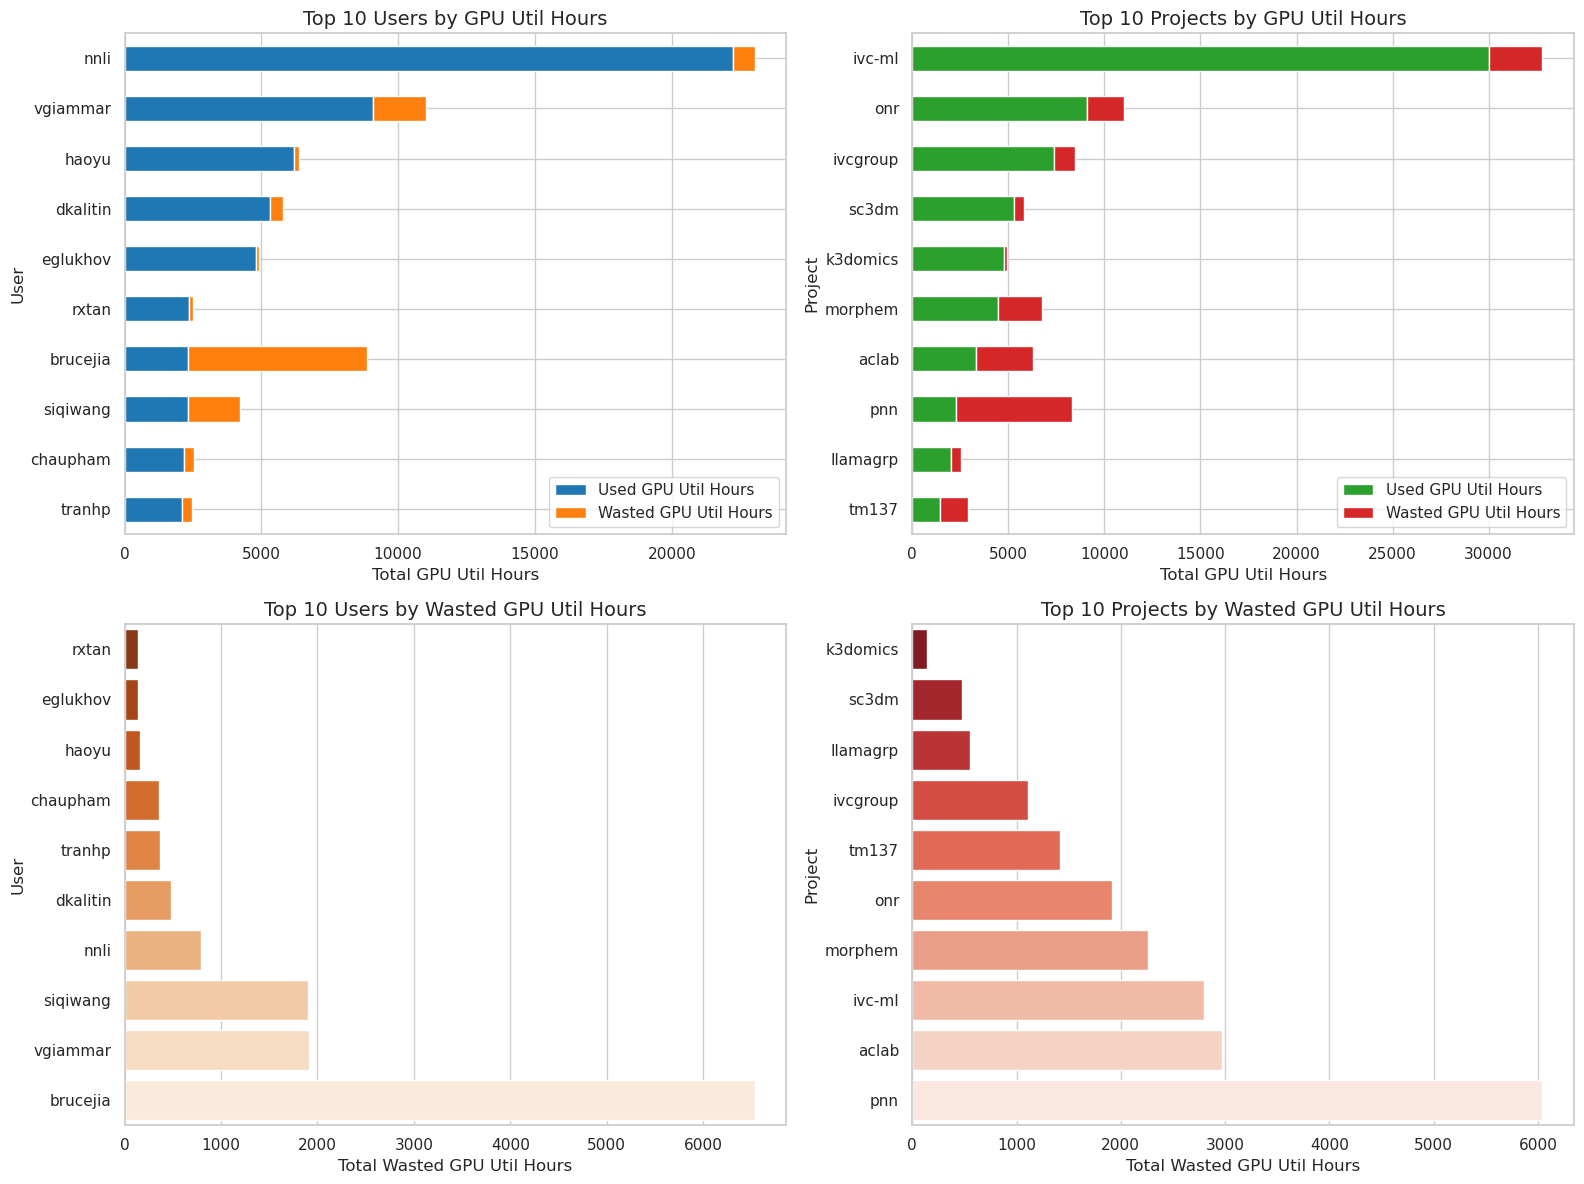

In [9]:
# Convert GPU usage to GPU hours
year_2024_01["gpu_hours"] = year_2024_01["util"] * (1/12) * (1/100) * year_2024_01["n_gpu"]
year_2024_01["wasted_gpu_hours"] = (100 - year_2024_01["util"]) * (1/12) * (1/100) * year_2024_01["n_gpu"]

# Aggregate GPU hours and wasted GPU hours for users and projects
top_users_gpu = year_2024_01.groupby("user")[["gpu_hours", "wasted_gpu_hours"]].sum().nlargest(10, "gpu_hours")
top_projects_gpu = year_2024_01.groupby("project_x")[["gpu_hours", "wasted_gpu_hours"]].sum().nlargest(10, "gpu_hours")

# Get the top users and projects by wasted GPU hours (sorted properly)
top_users_wasted = top_users_gpu.sort_values("wasted_gpu_hours", ascending=True)
top_projects_wasted = top_projects_gpu.sort_values("wasted_gpu_hours", ascending=True)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create subplots for users and projects
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot top users (used & wasted)
top_users_gpu.sort_values("gpu_hours", ascending=True).plot(kind="barh", stacked=True, ax=axes[0, 0], color=["#1f77b4", "#ff7f0e"])
axes[0, 0].set_title("Top 10 Users by GPU Util Hours", fontsize=14)
axes[0, 0].set_xlabel("Total GPU Util Hours", fontsize=12)
axes[0, 0].set_ylabel("User", fontsize=12)
axes[0, 0].legend(["Used GPU Util Hours", "Wasted GPU Util Hours"])

# Plot top projects (used & wasted)
top_projects_gpu.sort_values("gpu_hours", ascending=True).plot(kind="barh", stacked=True, ax=axes[0, 1], color=["#2ca02c", "#d62728"])
axes[0, 1].set_title("Top 10 Projects by GPU Util Hours", fontsize=14)
axes[0, 1].set_xlabel("Total GPU Util Hours", fontsize=12)
axes[0, 1].set_ylabel("Project", fontsize=12)
axes[0, 1].legend(["Used GPU Util Hours", "Wasted GPU Util Hours"])

# Plot wasted GPU hours for users (Sorted by wasted_gpu_hours)
sns.barplot(x=top_users_wasted["wasted_gpu_hours"], y=top_users_wasted.index, ax=axes[1, 0], palette="Oranges_r")
axes[1, 0].set_title("Top 10 Users by Wasted GPU Util Hours", fontsize=14)
axes[1, 0].set_xlabel("Total Wasted GPU Util Hours", fontsize=12)
axes[1, 0].set_ylabel("User", fontsize=12)

# Plot wasted GPU hours for projects (Sorted by wasted_gpu_hours)
sns.barplot(x=top_projects_wasted["wasted_gpu_hours"], y=top_projects_wasted.index, ax=axes[1, 1], palette="Reds_r")
axes[1, 1].set_title("Top 10 Projects by Wasted GPU Util Hours", fontsize=14)
axes[1, 1].set_xlabel("Total Wasted GPU Util Hours", fontsize=12)
axes[1, 1].set_ylabel("Project", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

## Examine by Counts

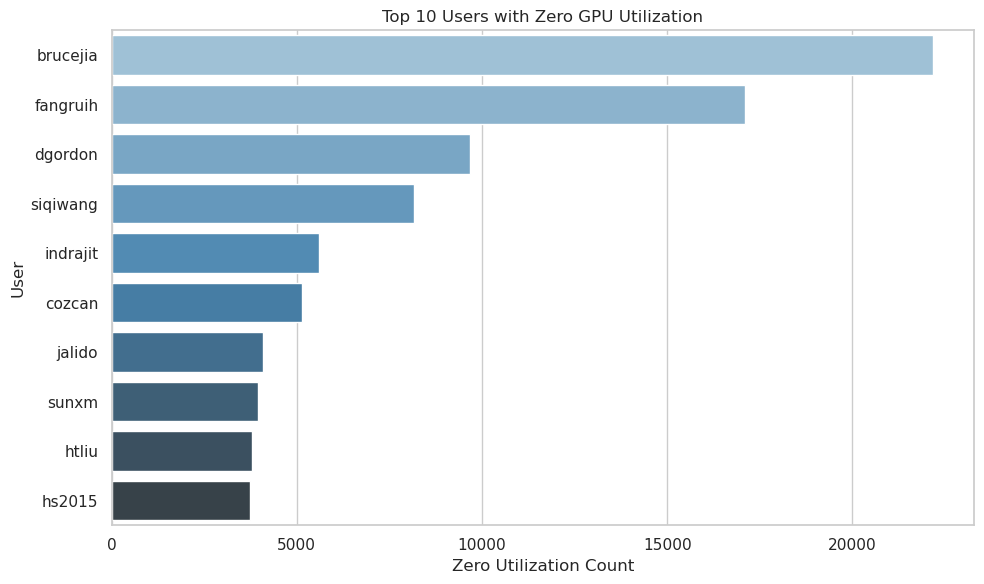

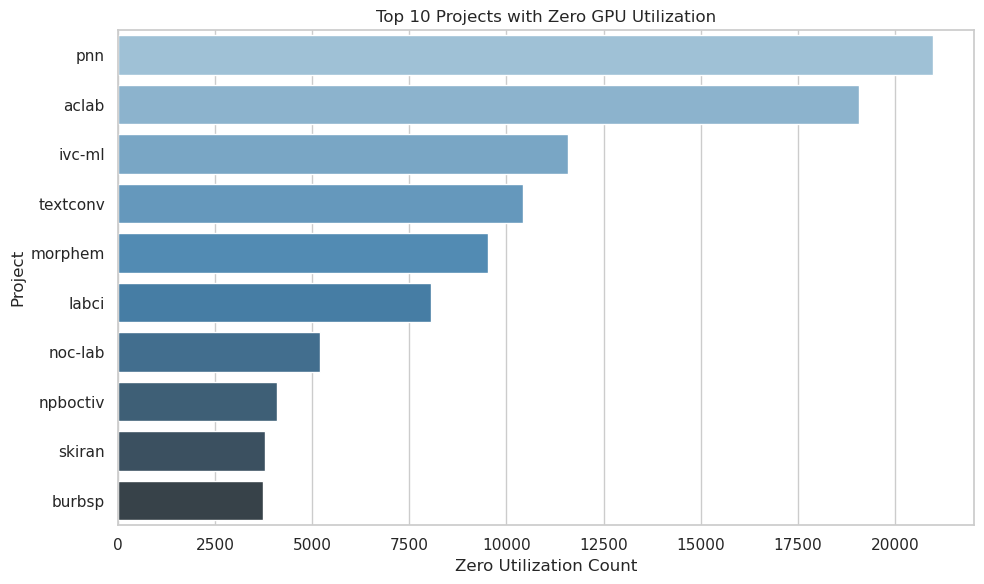

In [10]:
# Calculate the number of rows with zero utilization per user, note for scenario = 0
zero_util_users = year_2024_01[(year_2024_01['util'] == 0) & (year_2024_01['scenario'] != 0) & (year_2024_01['user'] != 'Missing Values')].dropna(subset=['user']).groupby('user').size().reset_index(name='zero_util_count')

# Calculate the number of rows with zero utilization per project
zero_util_projects = year_2024_01[(year_2024_01['util'] == 0) & (year_2024_01['scenario'] != 0) & (year_2024_01['user'] != 'Missing Values')].dropna(subset=['user']).groupby('project_x').size().reset_index(name='zero_util_count')

# Sort by zero_util_count in descending order for top users and projects
zero_util_users_sorted = zero_util_users.sort_values('zero_util_count', ascending=False).head(10)
zero_util_projects_sorted = zero_util_projects.sort_values('zero_util_count', ascending=False).head(10)

# Plot for top 10 users with zero GPU utilization
plt.figure(figsize=(10, 6))
sns.barplot(x='zero_util_count', y='user', data=zero_util_users_sorted, palette='Blues_d')
plt.title('Top 10 Users with Zero GPU Utilization')
plt.xlabel('Zero Utilization Count')
plt.ylabel('User')
plt.tight_layout()
plt.show()

# Plot for top 10 projects with zero GPU utilization
plt.figure(figsize=(10, 6))
sns.barplot(x='zero_util_count', y='project_x', data=zero_util_projects_sorted, palette='Blues_d')
plt.title('Top 10 Projects with Zero GPU Utilization')
plt.xlabel('Zero Utilization Count')
plt.ylabel('Project')
plt.tight_layout()
plt.show()

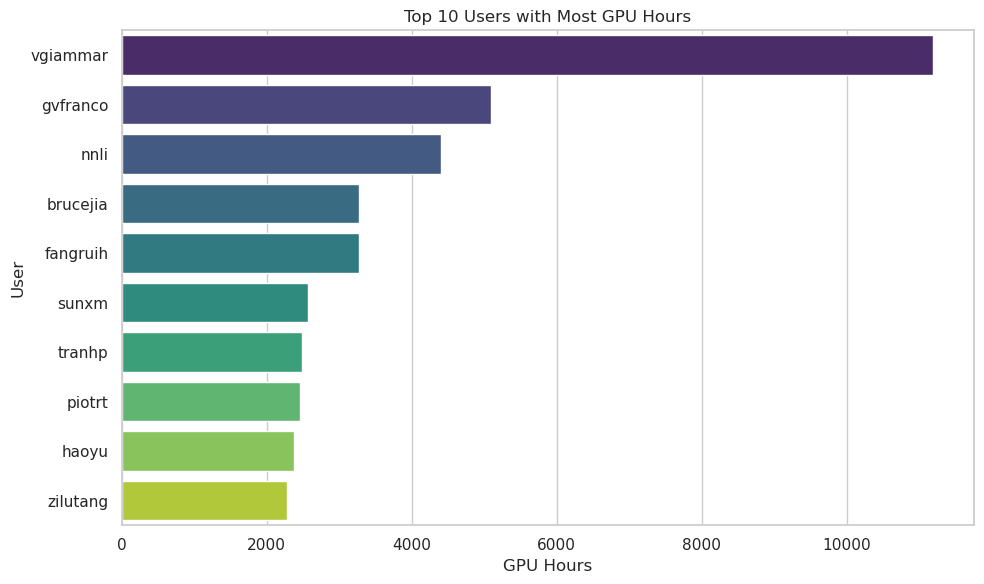

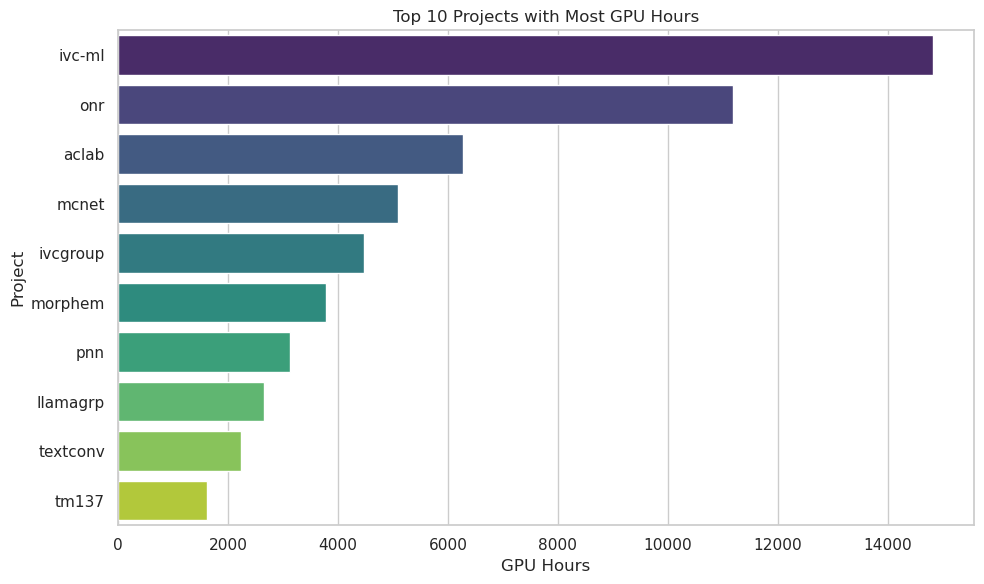

In [11]:
# Calculate the total GPU minutes per user (all rows, regardless of utilization)
gpu_minutes_users = year_2024_01.groupby('user').size().reset_index(name='gpu_minutes_count')
gpu_minutes_users = gpu_minutes_users[(gpu_minutes_users['user'] != '-') & (gpu_minutes_users['user'] != 'Missing Values')]
# Calculate the total GPU minutes per project
gpu_minutes_projects = year_2024_01.groupby('project_x').size().reset_index(name='gpu_minutes_count')
gpu_minutes_projects = gpu_minutes_projects[(gpu_minutes_projects['project_x'] != '-') & (gpu_minutes_projects['project_x'] != 'Missing Values')]

# Convert GPU minutes to GPU hours (since each row represents 5 minutes, divide by 12 to get hours)
gpu_minutes_users['gpu_hours_count'] = gpu_minutes_users['gpu_minutes_count'] / 12
gpu_minutes_projects['gpu_hours_count'] = gpu_minutes_projects['gpu_minutes_count'] / 12

# Sort by gpu_hours_count in descending order for top users and projects
gpu_minutes_users_sorted = gpu_minutes_users.sort_values('gpu_hours_count', ascending=False).head(10)
gpu_minutes_projects_sorted = gpu_minutes_projects.sort_values('gpu_hours_count', ascending=False).head(10)

# Plot for top 10 users with the most GPU hours
plt.figure(figsize=(10, 6))
sns.barplot(x='gpu_hours_count', y='user', data=gpu_minutes_users_sorted, palette='viridis')
plt.title('Top 10 Users with Most GPU Hours')
plt.xlabel('GPU Hours')
plt.ylabel('User')
plt.tight_layout()
plt.show()

# Plot for top 10 projects with the most GPU hours
plt.figure(figsize=(10, 6))
sns.barplot(x='gpu_hours_count', y='project_x', data=gpu_minutes_projects_sorted, palette='viridis')
plt.title('Top 10 Projects with Most GPU Hours')
plt.xlabel('GPU Hours')
plt.ylabel('Project')
plt.tight_layout()
plt.show()

In [1]:
import os
os.environ.get('NSLOTS')

'8'